In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import sys
import math
import keras.backend as K
import pickle
from skimage.io import imread
from keras.models import Model, Sequential
from keras.layers import Conv2D, Dense, Activation, Add, MaxPool2D, Input
from keras.layers import Deconv2D, Conv2DTranspose, UpSampling2D
from keras.applications.vgg16 import preprocess_input, decode_predictions

np.random.seed(0)
%matplotlib inline

In [4]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip

--2019-03-14 21:55:27--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.74.88
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.74.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327699796 (313M) [application/zip]
Saving to: ‘data_semantics.zip’

data_semantics.zip  100%[===================>] 312.52M  43.9MB/s    in 7.7s    

2019-03-14 21:55:35 (40.7 MB/s) - ‘data_semantics.zip’ saved [327699796/327699796]



In [0]:
!unzip data_semantics.zip

training/semantic -> 200 images
training/image_2 -> 200 images
training/instance -> 200 images
training/semantic_rgb -> 200 images
45


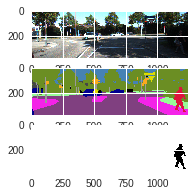

In [115]:
data = path_to_dict('training')
idx =199
sem = os.path.join('training/semantic', data['training/semantic'][idx])
sem_rgb = os.path.join('training/semantic_rgb', data['training/semantic_rgb'][idx])
inst = os.path.join('training/instance', data['training/instance'][idx])
img = os.path.join('training/image_2', data['training/image_2'][idx])

plt.subplot(4,1,1)
im = imread(img)
plt.imshow(im)
im = imread(sem_rgb)
plt.subplot(4,1,2)
plt.imshow(im)
im = np.all(im == np.array([220, 20, 60]), axis=2)
plt.subplot(4,1,3)
plt.imshow(im)

count = 0
for i in data['training/semantic_rgb']:
    im = imread(os.path.join('training/semantic_rgb',i))
    im = np.all(im == np.array([220, 20, 60]), axis=2)
    if np.any(im==True):
        count += 1
print("images with pedestrians", count)        